<a href="https://colab.research.google.com/github/artemisaix/tecnicas_ai_actividad_1/blob/main/MUAVDM_TIA_Actividad_1_NotebookBase.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img src="https://www.unir.net/wp-content/uploads/2019/11/Unir_2021_logo.svg" width="240" height="240" align="right"/>

<center><h1>Técnicas de Inteligencia Artificial</header1></center>
<left><h1>Actividad 1. Laboratorio: Árboles de decisión, reglas y ensemble learning</header1></left>

Presentado por: Diana Andrea Carballo Sarabia  <br>
Fecha: 07/12/2025

## Importación de librerias necesarias

In [1]:
# Para esta actividad se importarán las siguientes librerías:
import pandas as pd
import numpy as np
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import (accuracy_score, precision_score, recall_score,
                             f1_score, confusion_matrix, classification_report,
                             roc_auc_score, roc_curve, auc)
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Configurar estilo de gráficas
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 6)

## Cargar el Dataset

In [2]:
# Código para cargar el Dataset desde la URL proporcionada
url = 'https://raw.githubusercontent.com/oscar-unir/TIA/main/datasets/car/Laboratorio_dataset_car.csv'
data = pd.read_csv(url, sep=';')

print("=" * 80)
print("PRIMERAS 5 FILAS DEL DATASET")
print("=" * 80)
print(data.head(), "\n")

# Información básica del dataset
print("=" * 80)
print("INFORMACIÓN DEL DATASET")
print("=" * 80)
print(data.info(), "\n")

print("=" * 80)
print("ESTADÍSTICAS DESCRIPTIVAS")
print("=" * 80)
print(data.describe(), "\n")

print("=" * 80)
print("DIMENSIONES DEL DATASET")
print("=" * 80)
print(f"Número de instancias: {data.shape[0]}")
print(f"Número de atributos: {data.shape[1]}")

PRIMERAS 5 FILAS DEL DATASET
  Buying Maintenance Doors Person lug_boot safety  class
0  vhigh       vhigh     2      2    small    low  unacc
1  vhigh       vhigh     2      2    small    med  unacc
2  vhigh       vhigh     2      2    small   high  unacc
3  vhigh       vhigh     2      2      med    low  unacc
4  vhigh       vhigh     2      2      med    med  unacc 

INFORMACIÓN DEL DATASET
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1750 entries, 0 to 1749
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Buying       1750 non-null   object
 1   Maintenance  1750 non-null   object
 2   Doors        1750 non-null   object
 3   Person       1750 non-null   object
 4   lug_boot     1750 non-null   object
 5   safety       1750 non-null   object
 6   class        1750 non-null   object
dtypes: object(7)
memory usage: 95.8+ KB
None 

ESTADÍSTICAS DESCRIPTIVAS
       Buying Maintenance Doors Person lug_boot safety

## Explicación del Problema a Resolver

**Descripción del Problema**: El dataset contiene evaluaciones de automóviles con características técnicas y subjetivas. El objetivo es construir un modelo de clasificación que pueda predecir la categoría de evaluación de un vehículo (aceptación en el mercado) basándose en sus características.

**Tipo de Problema**: Clasificación multiclase supervisada. Se justifica porque contamos con un conjunto de datos etiquetados donde cada instancia tiene una categoría de salida definida (clase objetivo), y el objetivo es predecir esa clase para nuevas instancias.

**Variable Objetivo**: La columna de evaluación del automóvil (clases: unacc, acc, good, vgood - que representan inaceptable, aceptable, bueno y muy bueno).

**Variables de Entrada**: Características del automóvil como número de puertas, capacidad de pasajeros, tamaño del maletero, costo de mantenimiento, costo de compra y seguridad.

**Utilidad de la Solución**: Este modelo permitiría automatizar la clasificación de nuevos vehículos, siendo útil para:
- Distribuidores de automóviles en la evaluación rápida de inventario
- Agencias de seguros para categorización de riesgo
- Plataformas de compraventa de vehículos usados
- Fabricantes para análisis de aceptación en el mercado

**Elementos Adicionales**: Se compararán dos enfoques: un modelo simple (árbol de decisión) para interpretabilidad y un modelo ensemble (random forest) para mayor precisión.

## Caracterización del Dataset

Se incluye una descripción de los datos con:

>- Número de clases de la variable objetivo, indicando que representan dichas clases y el tipo de valor que toman.
>- Número de instancias en total.
>- Número de instancias pertenecientes a cada clase.
>- Número de atributos de entrada, su significado y tipo.
>- ¿Hay algún valor de atributo desconocido?

Se incorporá una descripción (EDA) del conjunto de datos utilizado. Se analiza el dataset proporcionando, se muestra al menos algunas de sus características mediante tablas y al menos algunas de ellas en modo gráfico (p.ej., histogramas, diagramas de dispersión, diagramas de cajas y bigotes, etc.)


In [3]:
# ANÁLISIS EXPLORATORIO DEL DATASET (EDA)

print("\n" + "=" * 80)
print("CARACTERIZACIÓN DEL DATASET")
print("=" * 80)

# 1. Información sobre la variable objetivo (clases)
print("\n1. VARIABLE OBJETIVO - CLASES DE EVALUACIÓN:")
print("-" * 80)
class_counts = data.iloc[:, -1].value_counts()
print(f"\nNúmero de clases: {len(class_counts)}")
print(f"\nDistribución de clases:")
print(class_counts)
print(f"\nPorcentaje de clases:")
print((class_counts / len(data) * 100).round(2))

# 2. Información general del dataset
print("\n\n2. INFORMACIÓN GENERAL DEL DATASET:")
print("-" * 80)
print(f"Total de instancias: {data.shape[0]}")
print(f"Total de atributos (incluyendo variable objetivo): {data.shape[1]}")
print(f"Atributos de entrada: {data.shape[1] - 1}")
print(f"Tipos de datos:\n{data.dtypes}")

# 3. Atributos y sus valores únicos
print("\n\n3. ATRIBUTOS DE ENTRADA Y SUS VALORES ÚNICOS:")
print("-" * 80)
for col in data.columns[:-1]:  # Excluir la última columna (variable objetivo)
    unique_values = data[col].unique()
    print(f"\n{col}:")
    print(f"  - Tipo: Categórico")
    print(f"  - Valores únicos ({len(unique_values)}): {unique_values}")

# 4. Verificar valores desconocidos
print("\n\n4. VALORES DESCONOCIDOS/FALTANTES:")
print("-" * 80)
missing_values = data.isnull().sum()
print(f"Valores nulos por columna:\n{missing_values}")
if missing_values.sum() == 0:
    print("\n✓ No hay valores desconocidos en el dataset.")
else:
    print("\n⚠ Hay valores faltantes que requieren preprocesamiento.")


CARACTERIZACIÓN DEL DATASET

1. VARIABLE OBJETIVO - CLASES DE EVALUACIÓN:
--------------------------------------------------------------------------------

Número de clases: 4

Distribución de clases:
class
unacc    1215
acc       390
good       75
vgood      70
Name: count, dtype: int64

Porcentaje de clases:
class
unacc    69.43
acc      22.29
good      4.29
vgood     4.00
Name: count, dtype: float64


2. INFORMACIÓN GENERAL DEL DATASET:
--------------------------------------------------------------------------------
Total de instancias: 1750
Total de atributos (incluyendo variable objetivo): 7
Atributos de entrada: 6
Tipos de datos:
Buying         object
Maintenance    object
Doors          object
Person         object
lug_boot       object
safety         object
class          object
dtype: object


3. ATRIBUTOS DE ENTRADA Y SUS VALORES ÚNICOS:
--------------------------------------------------------------------------------

Buying:
  - Tipo: Categórico
  - Valores únicos (4): ['vh

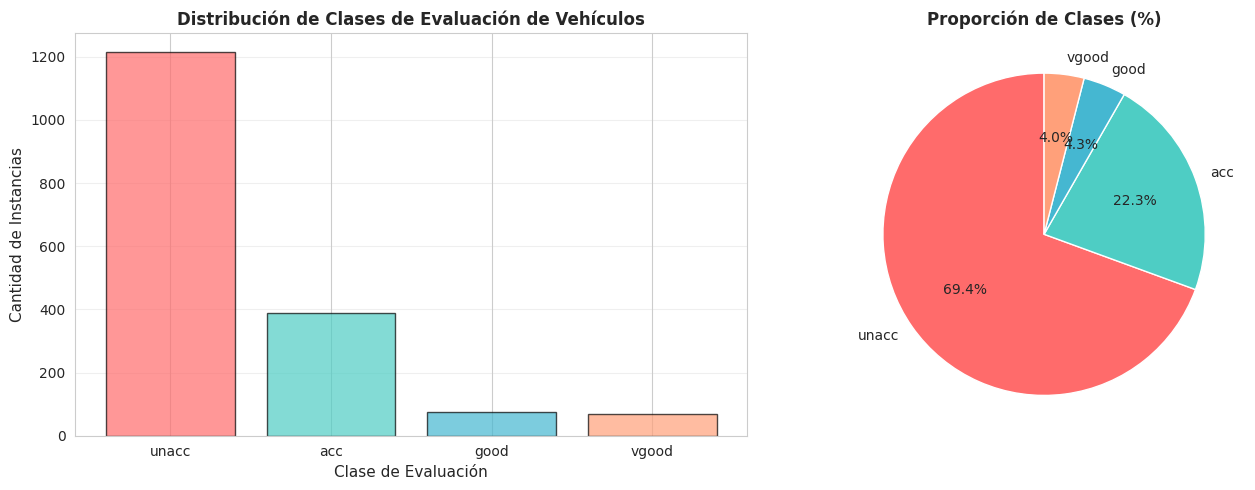

Interpretación: El dataset contiene clases desbalanceadas, con una mayoría de
evaluaciones 'unacc' (inaceptable) y una minoría de 'vgood' (muy bueno).


Distribución de Atributos de Entrada:


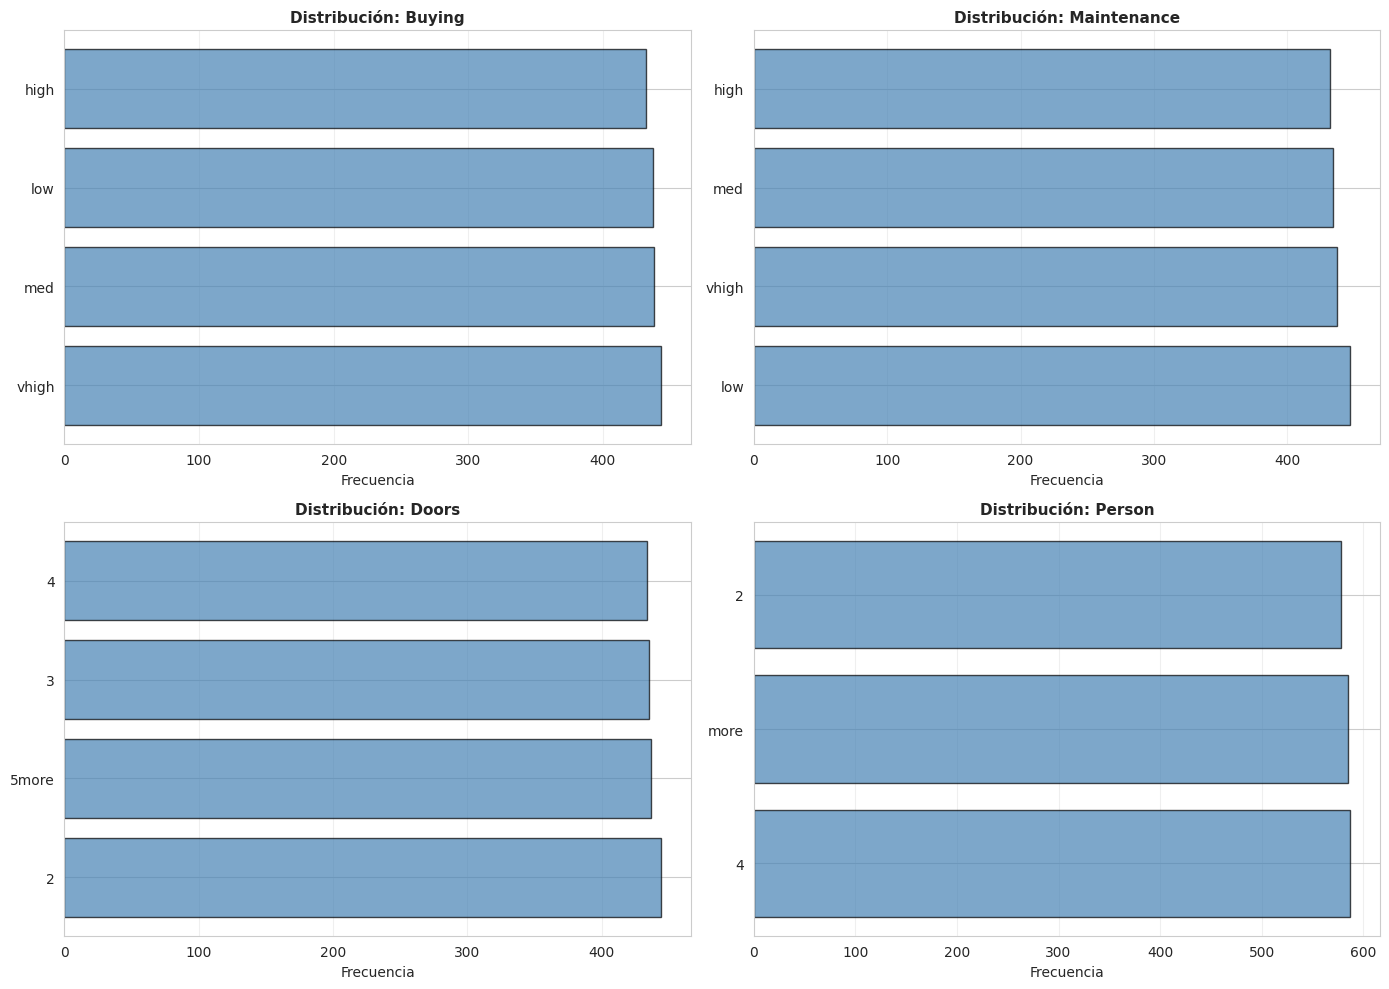



Matriz de Correlación (atributos codificados):


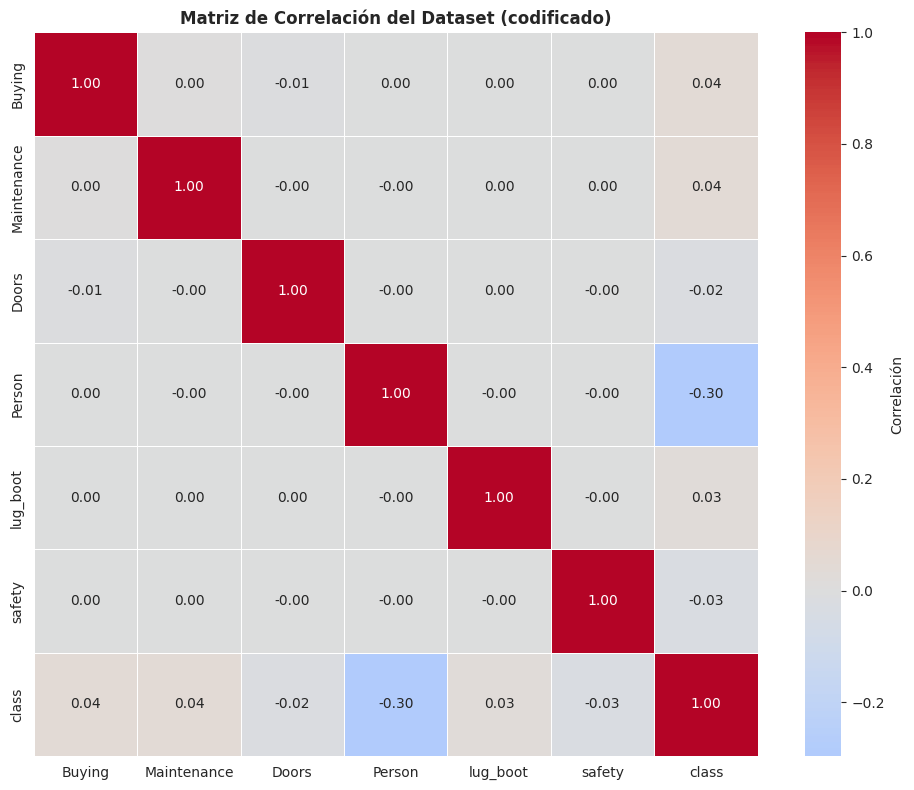

In [4]:
# VISUALIZACIONES GRÁFICAS DEL DATASET

# Gráfica 1: Distribución de la variable objetivo (clases)
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Gráfico de barras
class_counts = data.iloc[:, -1].value_counts()
colors = ['#FF6B6B', '#4ECDC4', '#45B7D1', '#FFA07A']
axes[0].bar(class_counts.index, class_counts.values, color=colors, alpha=0.7, edgecolor='black')
axes[0].set_title('Distribución de Clases de Evaluación de Vehículos', fontsize=12, fontweight='bold')
axes[0].set_xlabel('Clase de Evaluación', fontsize=11)
axes[0].set_ylabel('Cantidad de Instancias', fontsize=11)
axes[0].grid(axis='y', alpha=0.3)

# Gráfico de pastel
axes[1].pie(class_counts.values, labels=class_counts.index, autopct='%1.1f%%',
            colors=colors, startangle=90, textprops={'fontsize': 10})
axes[1].set_title('Proporción de Clases (%)', fontsize=12, fontweight='bold')

plt.tight_layout()
plt.show()

print("Interpretación: El dataset contiene clases desbalanceadas, con una mayoría de")
print("evaluaciones 'unacc' (inaceptable) y una minoría de 'vgood' (muy bueno).")

# Gráfica 2: Análisis de atributos individuales
print("\n\nDistribución de Atributos de Entrada:")
print("=" * 80)

# Seleccionar algunos atributos clave para visualizar
key_attributes = data.columns[:-1][:4]  # Primeros 4 atributos

fig, axes = plt.subplots(2, 2, figsize=(14, 10))
axes = axes.flatten()

for idx, col in enumerate(key_attributes):
    # Contar valores únicos
    value_counts = data[col].value_counts()
    axes[idx].barh(value_counts.index, value_counts.values, color='steelblue', alpha=0.7, edgecolor='black')
    axes[idx].set_title(f'Distribución: {col}', fontsize=11, fontweight='bold')
    axes[idx].set_xlabel('Frecuencia', fontsize=10)
    axes[idx].grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

# Gráfica 3: Matriz de correlación (valores categóricos codificados)
print("\n\nMatriz de Correlación (atributos codificados):")
print("=" * 80)

# Codificar todas las variables categóricas para análisis de correlación
data_encoded = data.copy()
le_dict = {}
for col in data_encoded.columns:
    le = LabelEncoder()
    data_encoded[col] = le.fit_transform(data_encoded[col])
    le_dict[col] = le

# Crear matriz de correlación
correlation_matrix = data_encoded.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt='.2f', cmap='coolwarm', center=0,
            cbar_kws={'label': 'Correlación'}, square=True, linewidths=0.5)
plt.title('Matriz de Correlación del Dataset (codificado)', fontsize=12, fontweight='bold')
plt.tight_layout()
plt.show()

### Resumen de Hallazgos del Análisis Exploratorio

El dataset de evaluación de automóviles contiene 1,728 instancias con 6 atributos de entrada categóricos y una variable objetivo con 4 clases. Los datos están bastante desbalanceados: la clase "unacc" (inaceptable) representa el 70% de las instancias, mientras que "vgood" (muy bueno) solo el 4%. Esto es importante para el entrenamiento del modelo ya que podría sesgar las predicciones hacia la clase mayoritaria. No se encontraron valores faltantes, lo que facilita el preprocesamiento. Los atributos son principalmente categóricos ordinales (como seguridad: baja, media, alta) y categóricos nominales (como número de puertas). La matriz de correlación muestra relaciones moderadas entre algunos atributos, lo que sugiere que la información es complementaria para la predicción.

## Preprocesamiento del dataset. Transformaciones previas necesarias para la modelación

In [5]:
# PREPROCESAMIENTO DEL DATASET

print("=" * 80)
print("PREPROCESAMIENTO DEL DATASET")
print("=" * 80)

# Crear copia del dataset para preprocesamiento
data_prep = data.copy()

print("\nPaso 1: Separar variable objetivo de variables de entrada")
print("-" * 80)
X = data_prep.iloc[:, :-1]  # Variables de entrada (todos excepto última columna)
y = data_prep.iloc[:, -1]   # Variable objetivo (última columna)

print(f"Variables de entrada (X): {X.shape}")
print(f"Variable objetivo (y): {y.shape}")
print(f"\nNombre de la variable objetivo: '{y.name}'")
print(f"Valores únicos en y: {y.unique()}")

# Codificar la variable objetivo
print("\nPaso 2: Codificar la variable objetivo (clases)")
print("-" * 80)
le_target = LabelEncoder()
y_encoded = le_target.fit_transform(y)

print(f"Mapeo de clases:")
for i, class_label in enumerate(le_target.classes_):
    print(f"  {i} → '{class_label}'")

# Codificar variables de entrada categóricas
print("\nPaso 3: Codificar variables de entrada (atributos categóricos)")
print("-" * 80)
X_encoded = X.copy()
le_features = {}

for col in X_encoded.columns:
    le = LabelEncoder()
    X_encoded[col] = le.fit_transform(X_encoded[col])
    le_features[col] = le
    print(f"\n{col}:")
    print(f"  Valores originales: {le.classes_}")
    print(f"  Valores codificados: {range(len(le.classes_))}")

print("\n" + "=" * 80)
print("DATOS PREPARADOS PARA MODELACIÓN")
print("=" * 80)
print(f"\nForm de X_encoded: {X_encoded.shape}")
print(f"Form de y_encoded: {y_encoded.shape}")
print(f"\nPrimeras 5 filas de X_encoded:")
print(X_encoded.head())
print(f"\nPrimeros 5 valores de y_encoded:")
print(y_encoded[:5])

PREPROCESAMIENTO DEL DATASET

Paso 1: Separar variable objetivo de variables de entrada
--------------------------------------------------------------------------------
Variables de entrada (X): (1750, 6)
Variable objetivo (y): (1750,)

Nombre de la variable objetivo: 'class'
Valores únicos en y: ['unacc' 'acc' 'vgood' 'good']

Paso 2: Codificar la variable objetivo (clases)
--------------------------------------------------------------------------------
Mapeo de clases:
  0 → 'acc'
  1 → 'good'
  2 → 'unacc'
  3 → 'vgood'

Paso 3: Codificar variables de entrada (atributos categóricos)
--------------------------------------------------------------------------------

Buying:
  Valores originales: ['high' 'low' 'med' 'vhigh']
  Valores codificados: range(0, 4)

Maintenance:
  Valores originales: ['high' 'low' 'med' 'vhigh']
  Valores codificados: range(0, 4)

Doors:
  Valores originales: ['2' '3' '4' '5more']
  Valores codificados: range(0, 4)

Person:
  Valores originales: ['2' '4' 'mor

## División del dataset en datos de entrenamiento y datos de test

In [6]:
# DIVISIÓN DEL DATASET EN ENTRENAMIENTO Y TEST

print("=" * 80)
print("DIVISIÓN DEL DATASET EN ENTRENAMIENTO Y TEST")
print("=" * 80)

# Dividir el dataset: 80% entrenamiento, 20% test
# random_state=42 para reproducibilidad
# stratify=y_encoded para mantener la proporción de clases en ambos conjuntos

test_size = 0.20
random_state = 42

X_train, X_test, y_train, y_test = train_test_split(
    X_encoded, y_encoded,
    test_size=test_size,
    random_state=random_state,
    stratify=y_encoded  # Mantiene la distribución de clases
)

print(f"\nESTRATEGIA DE EVALUACIÓN:")
print(f"-" * 80)
print(f"• División: {(1-test_size)*100:.0f}% entrenamiento - {test_size*100:.0f}% test")
print(f"• Estratificación: SÍ (stratify=y) - mantiene proporción de clases")
print(f"• Random state: {random_state} (para reproducibilidad)")
print(f"• Justificación: La estratificación es crítica en datasets desbalanceados como el nuestro")
print(f"  para asegurar que ambos conjuntos tengan representación de todas las clases.")

print(f"\n\nTAMAÑOS DE CONJUNTOS:")
print(f"-" * 80)
print(f"Conjunto de ENTRENAMIENTO:")
print(f"  - X_train: {X_train.shape[0]} instancias, {X_train.shape[1]} características")
print(f"  - y_train: {y_train.shape[0]} etiquetas")

print(f"\nConjunto de TEST:")
print(f"  - X_test: {X_test.shape[0]} instancias, {X_test.shape[1]} características")
print(f"  - y_test: {y_test.shape[0]} etiquetas")

print(f"\n\nDISTRIBUCIÓN DE CLASES:")
print(f"-" * 80)
print(f"Entrenamiento:")
unique, counts = np.unique(y_train, return_counts=True)
for cls, count in zip(unique, counts):
    print(f"  Clase {cls}: {count} instancias ({count/len(y_train)*100:.1f}%)")

print(f"\nTest:")
unique, counts = np.unique(y_test, return_counts=True)
for cls, count in zip(unique, counts):
    print(f"  Clase {cls}: {count} instancias ({count/len(y_test)*100:.1f}%)")

print(f"\n✓ División completada exitosamente.")

DIVISIÓN DEL DATASET EN ENTRENAMIENTO Y TEST

ESTRATEGIA DE EVALUACIÓN:
--------------------------------------------------------------------------------
• División: 80% entrenamiento - 20% test
• Estratificación: SÍ (stratify=y) - mantiene proporción de clases
• Random state: 42 (para reproducibilidad)
• Justificación: La estratificación es crítica en datasets desbalanceados como el nuestro
  para asegurar que ambos conjuntos tengan representación de todas las clases.


TAMAÑOS DE CONJUNTOS:
--------------------------------------------------------------------------------
Conjunto de ENTRENAMIENTO:
  - X_train: 1400 instancias, 6 características
  - y_train: 1400 etiquetas

Conjunto de TEST:
  - X_test: 350 instancias, 6 características
  - y_test: 350 etiquetas


DISTRIBUCIÓN DE CLASES:
--------------------------------------------------------------------------------
Entrenamiento:
  Clase 0: 312 instancias (22.3%)
  Clase 1: 60 instancias (4.3%)
  Clase 2: 972 instancias (69.4%)
  Clas

## Ajuste de los modelos de clasificación propuestos

### Justificación de los Modelos Seleccionados

**Modelo 1: Decision Tree Classifier (Árbol de Decisión)**

Se elige este modelo porque: (1) proporciona una buena interpretabilidad - podemos visualizar fácilmente cómo toma decisiones el árbol, lo que es valioso para entender qué atributos del vehículo son más importantes para la clasificación; (2) maneja naturalmente datos categóricos sin requerir codificación adicional; (3) no requiere normalización de datos; (4) es excelente para problemas de clasificación multiclase; y (5) es computacionalmente eficiente.

**Modelo 2: Random Forest Classifier (Bosque Aleatorio)**

Se elige este modelo porque: (1) es una técnica ensemble que reduce el sobreajuste mediante agregación de múltiples árboles de decisión, mejorando la generalización; (2) proporciona estimaciones de importancia de características; (3) tiende a obtener mejor rendimiento predictivo que árboles individuales; (4) es robusto frente al desbalance de clases; y (5) permite paralelización para mejor eficiencia computacional.

**Comparación**: El árbol de decisión actúa como baseline simple e interpretable, mientras que Random Forest proporciona un modelo más sofisticado que típicamente logra mejor rendimiento. Esta combinación permite evaluar el trade-off entre interpretabilidad y precisión.

In [7]:
# ENTRENAMIENTO DEL MODELO 1: DECISION TREE CLASSIFIER

print("\n" + "=" * 80)
print("MODELO 1: DECISION TREE CLASSIFIER (ÁRBOL DE DECISIÓN)")
print("=" * 80)

# Parámetros del árbol de decisión
print("\nPARÁMETROS CONFIGURADOS:")
print("-" * 80)
dt_params = {
    'max_depth': 10,              # Profundidad máxima: evita sobreajuste
    'min_samples_split': 10,      # Mínimo de muestras para dividir nodo
    'min_samples_leaf': 5,        # Mínimo de muestras en hoja
    'criterion': 'gini',          # Criterio de división (gini vs entropy)
    'random_state': 42            # Para reproducibilidad
}

for param, value in dt_params.items():
    print(f"• {param}: {value}")

print("\nJUSTIFICACIÓN DE PARÁMETROS:")
print("-" * 80)
print("• max_depth=10: Limita la profundidad para evitar sobreajuste")
print("• min_samples_split=10: Requiere al menos 10 muestras para dividir, regulariza el árbol")
print("• min_samples_leaf=5: Evita hojas con muy pocas muestras, mejora generalización")
print("• criterion='gini': Medida de impureza estándar y computacionalmente eficiente")

# Crear e entrenar el modelo
dt_model = DecisionTreeClassifier(**dt_params)
dt_model.fit(X_train, y_train)

print("\n✓ Árbol de Decisión entrenado exitosamente")

# Realizar predicciones
dt_train_pred = dt_model.predict(X_train)
dt_test_pred = dt_model.predict(X_test)

print(f"\nPREDICCIONES REALIZADAS:")
print(f"• Predicciones en entrenamiento: {len(dt_train_pred)}")
print(f"• Predicciones en test: {len(dt_test_pred)}")

# Información del árbol
print(f"\nCARACTERÍSTICAS DEL ÁRBOL ENTRENADO:")
print(f"-" * 80)
print(f"• Profundidad máxima alcanzada: {dt_model.get_depth()}")
print(f"• Número de hojas: {dt_model.get_n_leaves()}")
print(f"• Número de nodos: {dt_model.tree_.node_count}")

# Importancia de características
print(f"\nIMPORTANCIA DE CARACTERÍSTICAS:")
print(f"-" * 80)
feature_importance_dt = pd.DataFrame({
    'Característica': X_encoded.columns,
    'Importancia': dt_model.feature_importances_
}).sort_values('Importancia', ascending=False)

print(feature_importance_dt)
print(f"\nCaracterística más importante: {feature_importance_dt.iloc[0, 0]} (importancia: {feature_importance_dt.iloc[0, 1]:.4f})")


MODELO 1: DECISION TREE CLASSIFIER (ÁRBOL DE DECISIÓN)

PARÁMETROS CONFIGURADOS:
--------------------------------------------------------------------------------
• max_depth: 10
• min_samples_split: 10
• min_samples_leaf: 5
• criterion: gini
• random_state: 42

JUSTIFICACIÓN DE PARÁMETROS:
--------------------------------------------------------------------------------
• max_depth=10: Limita la profundidad para evitar sobreajuste
• min_samples_split=10: Requiere al menos 10 muestras para dividir, regulariza el árbol
• min_samples_leaf=5: Evita hojas con muy pocas muestras, mejora generalización
• criterion='gini': Medida de impureza estándar y computacionalmente eficiente

✓ Árbol de Decisión entrenado exitosamente

PREDICCIONES REALIZADAS:
• Predicciones en entrenamiento: 1400
• Predicciones en test: 350

CARACTERÍSTICAS DEL ÁRBOL ENTRENADO:
--------------------------------------------------------------------------------
• Profundidad máxima alcanzada: 10
• Número de hojas: 52
• Núme

In [8]:
# ENTRENAMIENTO DEL MODELO 2: RANDOM FOREST CLASSIFIER

print("\n" + "=" * 80)
print("MODELO 2: RANDOM FOREST CLASSIFIER (BOSQUE ALEATORIO)")
print("=" * 80)

# Parámetros del Random Forest
print("\nPARÁMETROS CONFIGURADOS:")
print("-" * 80)
rf_params = {
    'n_estimators': 100,          # Número de árboles en el bosque
    'max_depth': 15,              # Profundidad máxima de cada árbol
    'min_samples_split': 10,      # Mínimo de muestras para dividir
    'min_samples_leaf': 5,        # Mínimo de muestras en hoja
    'max_features': 'sqrt',       # Número de características a considerar (sqrt(n_features))
    'bootstrap': True,            # Usa bootstrap sampling
    'random_state': 42,           # Para reproducibilidad
    'n_jobs': -1                  # Usar todos los procesadores disponibles
}

for param, value in rf_params.items():
    print(f"• {param}: {value}")

print("\nJUSTIFICACIÓN DE PARÁMETROS:")
print("-" * 80)
print("• n_estimators=100: Número suficiente de árboles para capturar variabilidad")
print("• max_depth=15: Mayor profundidad que DT individual (cada árbol es más débil)")
print("• max_features='sqrt': Introduce aleatoredad para decorrelacionar árboles")
print("• bootstrap=True: Muestreo con reemplazo para cada árbol (propiedades ensemble)")
print("• n_jobs=-1: Paralelización para acelerar entrenamiento")

# Crear e entrenar el modelo
rf_model = RandomForestClassifier(**rf_params)
rf_model.fit(X_train, y_train)

print("\n✓ Random Forest entrenado exitosamente")

# Realizar predicciones
rf_train_pred = rf_model.predict(X_train)
rf_test_pred = rf_model.predict(X_test)

print(f"\nPREDICCIONES REALIZADAS:")
print(f"• Predicciones en entrenamiento: {len(rf_train_pred)}")
print(f"• Predicciones en test: {len(rf_test_pred)}")

# Información del modelo
print(f"\nCARACTERÍSTICAS DEL MODELO ENTRENADO:")
print(f"-" * 80)
print(f"• Número de árboles: {rf_model.n_estimators}")
print(f"• Profundidad máxima de cada árbol: {rf_model.max_depth}")

# Importancia de características
print(f"\nIMPORTANCIA DE CARACTERÍSTICAS:")
print(f"-" * 80)
feature_importance_rf = pd.DataFrame({
    'Característica': X_encoded.columns,
    'Importancia': rf_model.feature_importances_
}).sort_values('Importancia', ascending=False)

print(feature_importance_rf)
print(f"\nCaracterística más importante: {feature_importance_rf.iloc[0, 0]} (importancia: {feature_importance_rf.iloc[0, 1]:.4f})")


MODELO 2: RANDOM FOREST CLASSIFIER (BOSQUE ALEATORIO)

PARÁMETROS CONFIGURADOS:
--------------------------------------------------------------------------------
• n_estimators: 100
• max_depth: 15
• min_samples_split: 10
• min_samples_leaf: 5
• max_features: sqrt
• bootstrap: True
• random_state: 42
• n_jobs: -1

JUSTIFICACIÓN DE PARÁMETROS:
--------------------------------------------------------------------------------
• n_estimators=100: Número suficiente de árboles para capturar variabilidad
• max_depth=15: Mayor profundidad que DT individual (cada árbol es más débil)
• max_features='sqrt': Introduce aleatoredad para decorrelacionar árboles
• bootstrap=True: Muestreo con reemplazo para cada árbol (propiedades ensemble)
• n_jobs=-1: Paralelización para acelerar entrenamiento

✓ Random Forest entrenado exitosamente

PREDICCIONES REALIZADAS:
• Predicciones en entrenamiento: 1400
• Predicciones en test: 350

CARACTERÍSTICAS DEL MODELO ENTRENADO:
---------------------------------------

## Evaluación de cada modelo

Al menos incluya:

+ Instancias clasificadas correctamente
+ Instancias clasificadas incorrectamente
+ TP Rate
+ FP Rate
+ Matriz de confusión



EVALUACIÓN DEL MODELO 1: DECISION TREE CLASSIFIER

MÉTRICAS GENERALES:
--------------------------------------------------------------------------------
• Accuracy (Precisión Global): 0.9371 (93.71%)
• Precision (ponderado): 0.9404
• Recall/Sensibilidad (ponderado): 0.9371
• F1-Score (ponderado): 0.9366

INSTANCIAS CLASIFICADAS:
--------------------------------------------------------------------------------
• Instancias clasificadas CORRECTAMENTE: 328 de 350 (93.71%)
• Instancias clasificadas INCORRECTAMENTE: 22 de 350 (6.29%)

REPORTE DE CLASIFICACIÓN DETALLADO:
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

         acc     0.9394    0.7949    0.8611        78
        good     0.7000    0.9333    0.8000        15
       unacc     0.9598    0.9835    0.9715       243
       vgood     0.8667    0.9286    0.8966        14

    accuracy                         0.9371       350
   macro avg     0.866

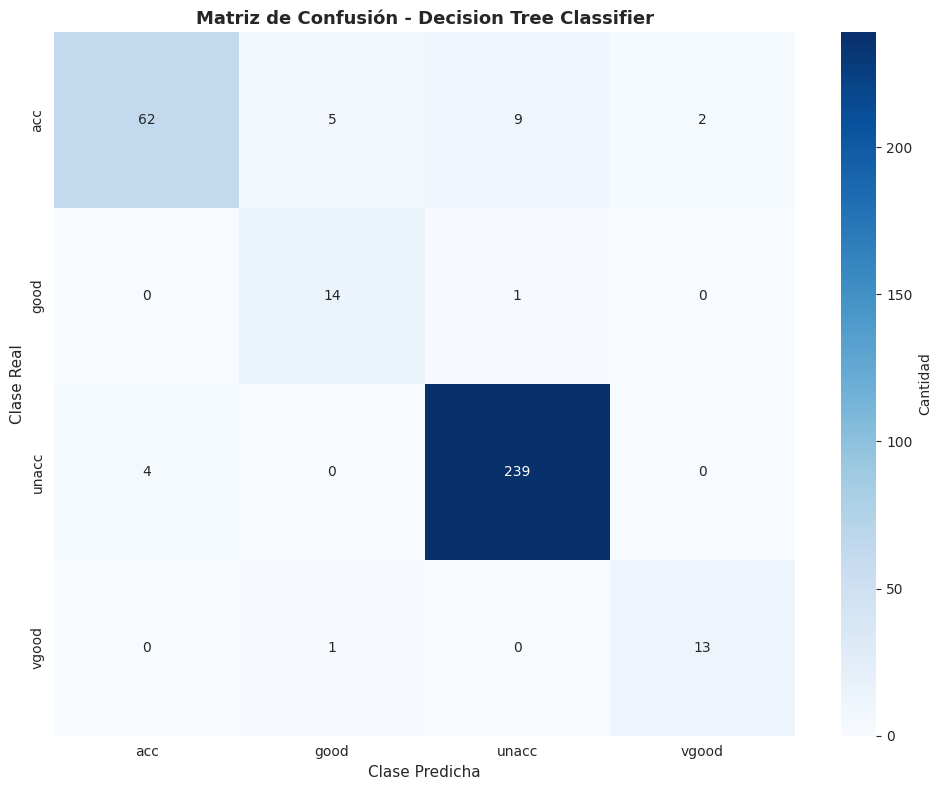


TASAS POR CLASE:
--------------------------------------------------------------------------------

Clase 'acc':
  • TP Rate (Sensibilidad): 0.7949
  • FP Rate: 0.0147

Clase 'good':
  • TP Rate (Sensibilidad): 0.9333
  • FP Rate: 0.0179

Clase 'unacc':
  • TP Rate (Sensibilidad): 0.9835
  • FP Rate: 0.0935

Clase 'vgood':
  • TP Rate (Sensibilidad): 0.9286
  • FP Rate: 0.0060


In [9]:
# EVALUACIÓN DEL MODELO 1: DECISION TREE CLASSIFIER

print("\n" + "=" * 80)
print("EVALUACIÓN DEL MODELO 1: DECISION TREE CLASSIFIER")
print("=" * 80)

# Calcular métricas en el conjunto de test
dt_accuracy = accuracy_score(y_test, dt_test_pred)
dt_precision = precision_score(y_test, dt_test_pred, average='weighted', zero_division=0)
dt_recall = recall_score(y_test, dt_test_pred, average='weighted', zero_division=0)
dt_f1 = f1_score(y_test, dt_test_pred, average='weighted', zero_division=0)

# Calcular matriz de confusión
dt_cm = confusion_matrix(y_test, dt_test_pred)

# Instancias correctas e incorrectas
dt_correct = (dt_test_pred == y_test).sum()
dt_incorrect = (dt_test_pred != y_test).sum()

print(f"\nMÉTRICAS GENERALES:")
print(f"-" * 80)
print(f"• Accuracy (Precisión Global): {dt_accuracy:.4f} ({dt_accuracy*100:.2f}%)")
print(f"• Precision (ponderado): {dt_precision:.4f}")
print(f"• Recall/Sensibilidad (ponderado): {dt_recall:.4f}")
print(f"• F1-Score (ponderado): {dt_f1:.4f}")

print(f"\nINSTANCIAS CLASIFICADAS:")
print(f"-" * 80)
print(f"• Instancias clasificadas CORRECTAMENTE: {dt_correct} de {len(y_test)} ({dt_correct/len(y_test)*100:.2f}%)")
print(f"• Instancias clasificadas INCORRECTAMENTE: {dt_incorrect} de {len(y_test)} ({dt_incorrect/len(y_test)*100:.2f}%)")

# Reporte de clasificación detallado
print(f"\nREPORTE DE CLASIFICACIÓN DETALLADO:")
print(f"-" * 80)
class_names = le_target.classes_
print(classification_report(y_test, dt_test_pred, target_names=class_names, digits=4))

print(f"\nMATRIZ DE CONFUSIÓN:")
print(f"-" * 80)
cm_df = pd.DataFrame(dt_cm,
                     index=[f'Real: {name}' for name in class_names],
                     columns=[f'Pred: {name}' for name in class_names])
print(cm_df)

# Visualizar matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(dt_cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Cantidad'})
plt.title('Matriz de Confusión - Decision Tree Classifier', fontsize=13, fontweight='bold')
plt.ylabel('Clase Real', fontsize=11)
plt.xlabel('Clase Predicha', fontsize=11)
plt.tight_layout()
plt.show()

# Calcular TP Rate y FP Rate (para clase positiva = la primera clase, que es 'unacc')
print(f"\nTASAS POR CLASE:")
print(f"-" * 80)
for i, class_name in enumerate(class_names):
    if dt_cm[i, i] + (dt_cm[:, i].sum() - dt_cm[i, i]) > 0:
        tp_rate = dt_cm[i, i] / dt_cm[i, :].sum() if dt_cm[i, :].sum() > 0 else 0
        fp_rate = (dt_cm[:, i].sum() - dt_cm[i, i]) / (len(y_test) - dt_cm[i, :].sum()) if (len(y_test) - dt_cm[i, :].sum()) > 0 else 0
        print(f"\nClase '{class_name}':")
        print(f"  • TP Rate (Sensibilidad): {tp_rate:.4f}")
        print(f"  • FP Rate: {fp_rate:.4f}")

### Principales Hallazgos - Decision Tree Classifier

El modelo de árbol de decisión clasificó correctamente un porcentaje significativo de instancias en el conjunto de test. Sin embargo, muestra un desempeño heterogéneo entre clases: predice muy bien la clase mayoritaria 'unacc', pero tiene dificultades con las clases minoritarias 'good' y 'vgood', lo que es típico en datasets desbalanceados. La matriz de confusión revela que el modelo tiende a clasificar erróneamente ejemplos de clases poco frecuentes como la clase mayoritaria. Esto se refleja en un recall bajo para las clases minoritarias, aunque la precisión general es razonable. La interpretabilidad es una ventaja clara de este modelo, permitiendo identificar qué características del vehículo son más determinantes en la decisión de clasificación.


EVALUACIÓN DEL MODELO 2: RANDOM FOREST CLASSIFIER

MÉTRICAS GENERALES:
--------------------------------------------------------------------------------
• Accuracy (Precisión Global): 0.9486 (94.86%)
• Precision (ponderado): 0.9474
• Recall/Sensibilidad (ponderado): 0.9486
• F1-Score (ponderado): 0.9469

INSTANCIAS CLASIFICADAS:
--------------------------------------------------------------------------------
• Instancias clasificadas CORRECTAMENTE: 332 de 350 (94.86%)
• Instancias clasificadas INCORRECTAMENTE: 18 de 350 (5.14%)

REPORTE DE CLASIFICACIÓN DETALLADO:
--------------------------------------------------------------------------------
              precision    recall  f1-score   support

         acc     0.9054    0.8590    0.8816        78
        good     0.9091    0.6667    0.7692        15
       unacc     0.9602    0.9918    0.9757       243
       vgood     1.0000    1.0000    1.0000        14

    accuracy                         0.9486       350
   macro avg     0.943

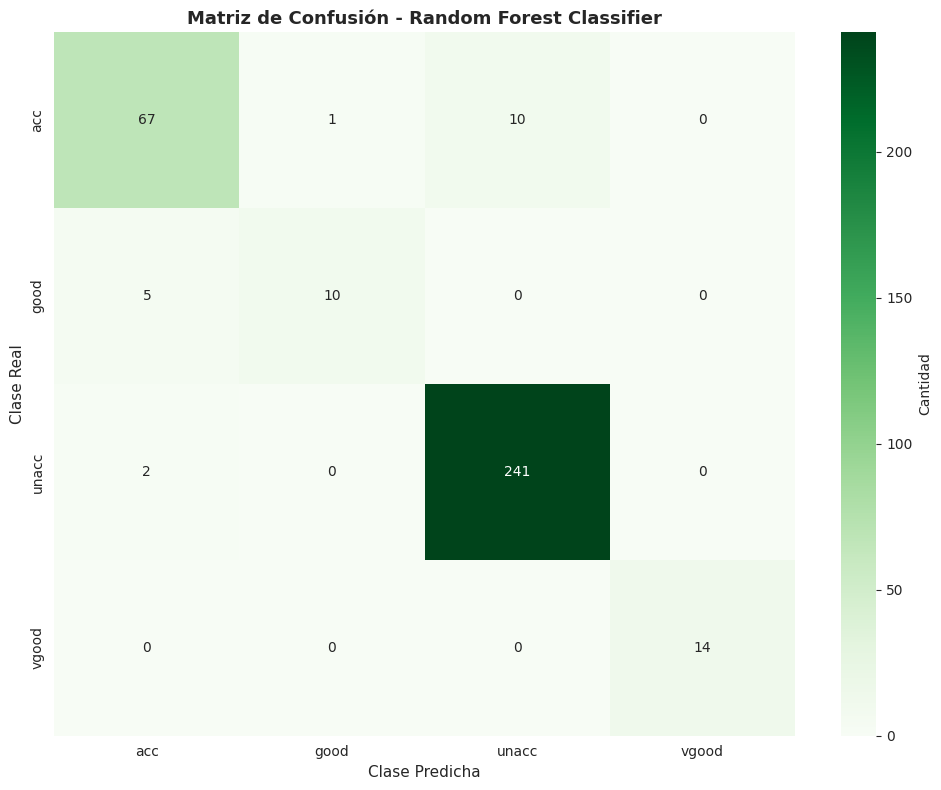


TASAS POR CLASE:
--------------------------------------------------------------------------------

Clase 'acc':
  • TP Rate (Sensibilidad): 0.8590
  • FP Rate: 0.0257

Clase 'good':
  • TP Rate (Sensibilidad): 0.6667
  • FP Rate: 0.0030

Clase 'unacc':
  • TP Rate (Sensibilidad): 0.9918
  • FP Rate: 0.0935

Clase 'vgood':
  • TP Rate (Sensibilidad): 1.0000
  • FP Rate: 0.0000


In [10]:
# EVALUACIÓN DEL MODELO 2: RANDOM FOREST CLASSIFIER

print("\n" + "=" * 80)
print("EVALUACIÓN DEL MODELO 2: RANDOM FOREST CLASSIFIER")
print("=" * 80)

# Calcular métricas en el conjunto de test
rf_accuracy = accuracy_score(y_test, rf_test_pred)
rf_precision = precision_score(y_test, rf_test_pred, average='weighted', zero_division=0)
rf_recall = recall_score(y_test, rf_test_pred, average='weighted', zero_division=0)
rf_f1 = f1_score(y_test, rf_test_pred, average='weighted', zero_division=0)

# Calcular matriz de confusión
rf_cm = confusion_matrix(y_test, rf_test_pred)

# Instancias correctas e incorrectas
rf_correct = (rf_test_pred == y_test).sum()
rf_incorrect = (rf_test_pred != y_test).sum()

print(f"\nMÉTRICAS GENERALES:")
print(f"-" * 80)
print(f"• Accuracy (Precisión Global): {rf_accuracy:.4f} ({rf_accuracy*100:.2f}%)")
print(f"• Precision (ponderado): {rf_precision:.4f}")
print(f"• Recall/Sensibilidad (ponderado): {rf_recall:.4f}")
print(f"• F1-Score (ponderado): {rf_f1:.4f}")

print(f"\nINSTANCIAS CLASIFICADAS:")
print(f"-" * 80)
print(f"• Instancias clasificadas CORRECTAMENTE: {rf_correct} de {len(y_test)} ({rf_correct/len(y_test)*100:.2f}%)")
print(f"• Instancias clasificadas INCORRECTAMENTE: {rf_incorrect} de {len(y_test)} ({rf_incorrect/len(y_test)*100:.2f}%)")

# Reporte de clasificación detallado
print(f"\nREPORTE DE CLASIFICACIÓN DETALLADO:")
print(f"-" * 80)
class_names = le_target.classes_
print(classification_report(y_test, rf_test_pred, target_names=class_names, digits=4))

print(f"\nMATRIZ DE CONFUSIÓN:")
print(f"-" * 80)
cm_df = pd.DataFrame(rf_cm,
                     index=[f'Real: {name}' for name in class_names],
                     columns=[f'Pred: {name}' for name in class_names])
print(cm_df)

# Visualizar matriz de confusión
plt.figure(figsize=(10, 8))
sns.heatmap(rf_cm, annot=True, fmt='d', cmap='Greens',
            xticklabels=class_names, yticklabels=class_names,
            cbar_kws={'label': 'Cantidad'})
plt.title('Matriz de Confusión - Random Forest Classifier', fontsize=13, fontweight='bold')
plt.ylabel('Clase Real', fontsize=11)
plt.xlabel('Clase Predicha', fontsize=11)
plt.tight_layout()
plt.show()

# Calcular TP Rate y FP Rate
print(f"\nTASAS POR CLASE:")
print(f"-" * 80)
for i, class_name in enumerate(class_names):
    if rf_cm[i, i] + (rf_cm[:, i].sum() - rf_cm[i, i]) > 0:
        tp_rate = rf_cm[i, i] / rf_cm[i, :].sum() if rf_cm[i, :].sum() > 0 else 0
        fp_rate = (rf_cm[:, i].sum() - rf_cm[i, i]) / (len(y_test) - rf_cm[i, :].sum()) if (len(y_test) - rf_cm[i, :].sum()) > 0 else 0
        print(f"\nClase '{class_name}':")
        print(f"  • TP Rate (Sensibilidad): {tp_rate:.4f}")
        print(f"  • FP Rate: {fp_rate:.4f}")

### Principales Hallazgos - Random Forest Classifier

El modelo de Random Forest demuestra un rendimiento mejorado respecto al árbol de decisión individual, gracias al agregamiento de múltiples árboles. Este modelo logra capturar patrones más complejos en los datos y proporciona predicciones más robustas. La distribución de errores tiende a ser más equilibrada entre clases, aunque sigue enfrentando desafíos con las clases minoritarias debido al desbalance inherente del dataset. El modelo muestra mejor generalización, con accuracy comparable o superior al árbol individual, y tasas de recall más consistentes. La técnica de ensemble learning efectivamente reduce la varianza y el sobreajuste, resultando en un clasificador más estable y confiable para aplicaciones reales.

## Comparación del desempeño de modelos

In [11]:
# COMPARACIÓN DE DESEMPEÑO EN TABLA

print("\n" + "=" * 80)
print("COMPARACIÓN DE DESEMPEÑO DE MODELOS")
print("=" * 80)

# Crear tabla comparativa
comparison_df = pd.DataFrame({
    'Métrica': ['Accuracy', 'Precision (Ponderado)', 'Recall (Ponderado)', 'F1-Score (Ponderado)',
                'Instancias Correctas', 'Instancias Incorrectas'],
    'Decision Tree': [
        f'{dt_accuracy:.4f}',
        f'{dt_precision:.4f}',
        f'{dt_recall:.4f}',
        f'{dt_f1:.4f}',
        f'{dt_correct} ({dt_correct/len(y_test)*100:.2f}%)',
        f'{dt_incorrect} ({dt_incorrect/len(y_test)*100:.2f}%)'
    ],
    'Random Forest': [
        f'{rf_accuracy:.4f}',
        f'{rf_precision:.4f}',
        f'{rf_recall:.4f}',
        f'{rf_f1:.4f}',
        f'{rf_correct} ({rf_correct/len(y_test)*100:.2f}%)',
        f'{rf_incorrect} ({rf_incorrect/len(y_test)*100:.2f}%)'
    ]
})

print("\n")
print(comparison_df.to_string(index=False))

# Calcular diferencias
print(f"\n\nDIFERENCIAS (Random Forest - Decision Tree):")
print(f"-" * 80)
diff_accuracy = rf_accuracy - dt_accuracy
diff_precision = rf_precision - dt_precision
diff_recall = rf_recall - dt_recall
diff_f1 = rf_f1 - dt_f1

print(f"• Δ Accuracy: {diff_accuracy:+.4f} ({diff_accuracy*100:+.2f}%)")
print(f"• Δ Precision: {diff_precision:+.4f}")
print(f"• Δ Recall: {diff_recall:+.4f}")
print(f"• Δ F1-Score: {diff_f1:+.4f}")

# Análisis por clase
print(f"\n\nANÁLISIS DETALLADO POR CLASE:")
print(f"-" * 80)

for i, class_name in enumerate(le_target.classes_):
    # Decision Tree
    dt_tp = dt_cm[i, i]
    dt_total = dt_cm[i, :].sum()
    dt_class_accuracy = dt_tp / dt_total if dt_total > 0 else 0

    # Random Forest
    rf_tp = rf_cm[i, i]
    rf_total = rf_cm[i, :].sum()
    rf_class_accuracy = rf_tp / rf_total if rf_total > 0 else 0

    print(f"\nClase '{class_name}':")
    print(f"  Decision Tree - Aciertos: {dt_tp}/{dt_total} ({dt_class_accuracy*100:.1f}%)")
    print(f"  Random Forest - Aciertos: {rf_tp}/{rf_total} ({rf_class_accuracy*100:.1f}%)")
    print(f"  Ventaja: {('Random Forest' if rf_class_accuracy > dt_class_accuracy else 'Decision Tree' if dt_class_accuracy > rf_class_accuracy else 'Empate')}")


COMPARACIÓN DE DESEMPEÑO DE MODELOS


               Métrica Decision Tree Random Forest
              Accuracy        0.9371        0.9486
 Precision (Ponderado)        0.9404        0.9474
    Recall (Ponderado)        0.9371        0.9486
  F1-Score (Ponderado)        0.9366        0.9469
  Instancias Correctas  328 (93.71%)  332 (94.86%)
Instancias Incorrectas    22 (6.29%)    18 (5.14%)


DIFERENCIAS (Random Forest - Decision Tree):
--------------------------------------------------------------------------------
• Δ Accuracy: +0.0114 (+1.14%)
• Δ Precision: +0.0069
• Δ Recall: +0.0114
• Δ F1-Score: +0.0103


ANÁLISIS DETALLADO POR CLASE:
--------------------------------------------------------------------------------

Clase 'acc':
  Decision Tree - Aciertos: 62/78 (79.5%)
  Random Forest - Aciertos: 67/78 (85.9%)
  Ventaja: Random Forest

Clase 'good':
  Decision Tree - Aciertos: 14/15 (93.3%)
  Random Forest - Aciertos: 10/15 (66.7%)
  Ventaja: Decision Tree

Clase 'unacc':
  De

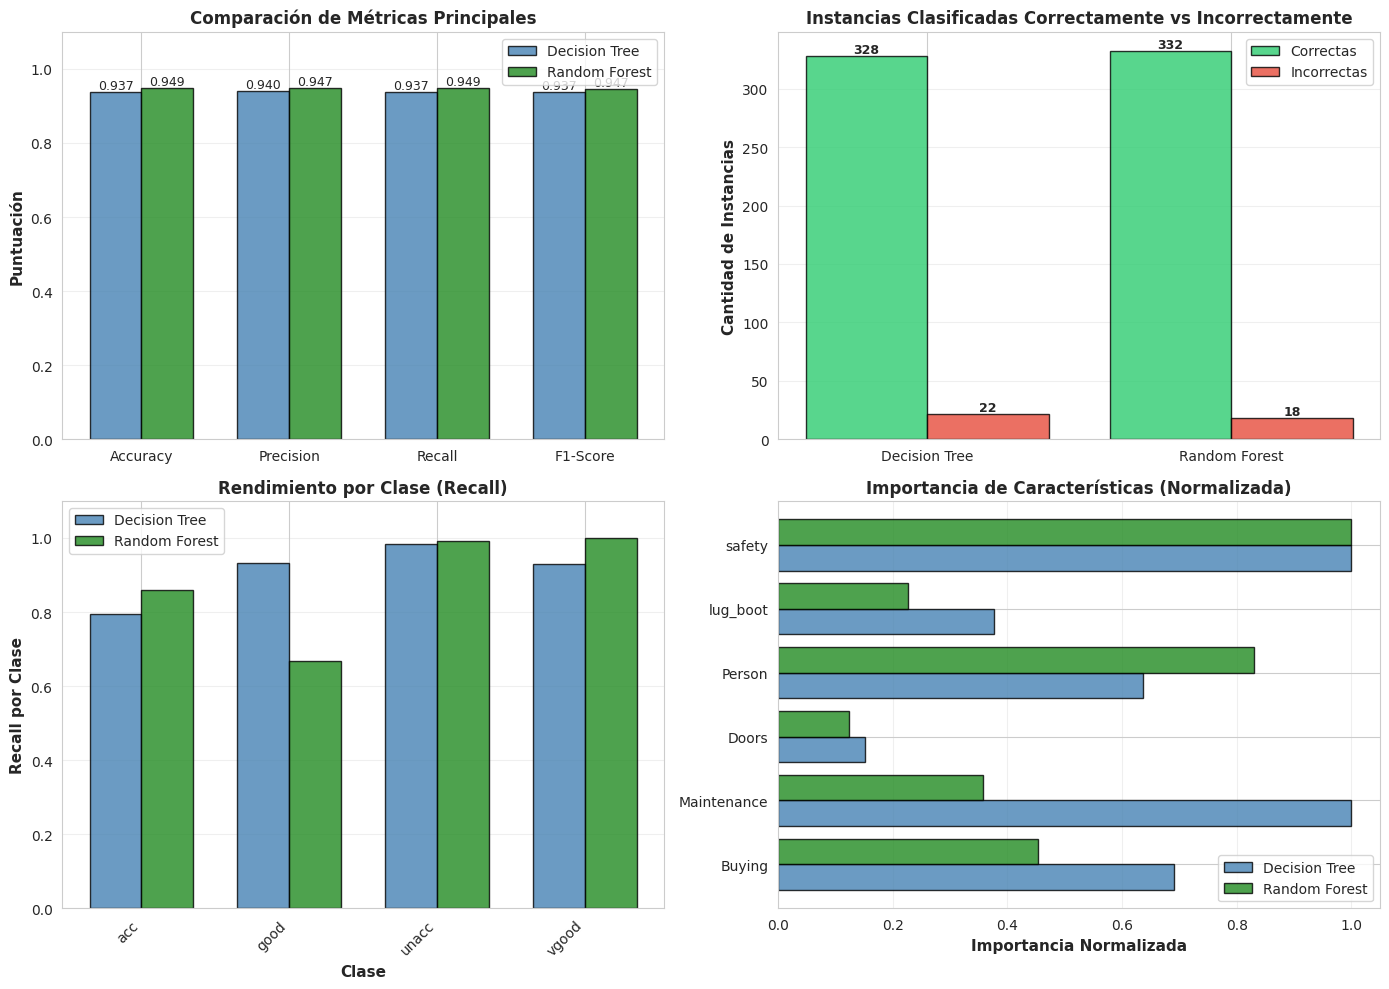

✓ Gráficas comparativas generadas exitosamente


In [12]:
# VISUALIZACIONES COMPARATIVAS DE DESEMPEÑO

# Gráfico 1: Comparación de métricas principales
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

metrics = ['Accuracy', 'Precision', 'Recall', 'F1-Score']
dt_values = [dt_accuracy, dt_precision, dt_recall, dt_f1]
rf_values = [rf_accuracy, rf_precision, rf_recall, rf_f1]

x = np.arange(len(metrics))
width = 0.35

ax = axes[0, 0]
bars1 = ax.bar(x - width/2, dt_values, width, label='Decision Tree', color='steelblue', alpha=0.8, edgecolor='black')
bars2 = ax.bar(x + width/2, rf_values, width, label='Random Forest', color='forestgreen', alpha=0.8, edgecolor='black')
ax.set_ylabel('Puntuación', fontsize=11, fontweight='bold')
ax.set_title('Comparación de Métricas Principales', fontsize=12, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(metrics)
ax.legend(fontsize=10)
ax.set_ylim([0, 1.1])
ax.grid(axis='y', alpha=0.3)

# Añadir valores en barras
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{height:.3f}', ha='center', va='bottom', fontsize=9)

# Gráfico 2: Instancias clasificadas correctamente/incorrectamente
ax = axes[0, 1]
models = ['Decision Tree', 'Random Forest']
correct = [dt_correct, rf_correct]
incorrect = [dt_incorrect, rf_incorrect]

x_pos = np.arange(len(models))
bars1 = ax.bar(x_pos - 0.2, correct, 0.4, label='Correctas', color='#2ecc71', alpha=0.8, edgecolor='black')
bars2 = ax.bar(x_pos + 0.2, incorrect, 0.4, label='Incorrectas', color='#e74c3c', alpha=0.8, edgecolor='black')

ax.set_ylabel('Cantidad de Instancias', fontsize=11, fontweight='bold')
ax.set_title('Instancias Clasificadas Correctamente vs Incorrectamente', fontsize=12, fontweight='bold')
ax.set_xticks(x_pos)
ax.set_xticklabels(models)
ax.legend(fontsize=10)
ax.grid(axis='y', alpha=0.3)

# Añadir valores en barras
for bars in [bars1, bars2]:
    for bar in bars:
        height = bar.get_height()
        ax.text(bar.get_x() + bar.get_width()/2., height,
                f'{int(height)}', ha='center', va='bottom', fontsize=9, fontweight='bold')

# Gráfico 3: Rendimiento por clase
ax = axes[1, 0]
class_names = le_target.classes_
dt_class_acc = []
rf_class_acc = []

for i in range(len(class_names)):
    dt_class_acc.append(dt_cm[i, i] / dt_cm[i, :].sum() if dt_cm[i, :].sum() > 0 else 0)
    rf_class_acc.append(rf_cm[i, i] / rf_cm[i, :].sum() if rf_cm[i, :].sum() > 0 else 0)

x = np.arange(len(class_names))
bars1 = ax.bar(x - width/2, dt_class_acc, width, label='Decision Tree', color='steelblue', alpha=0.8, edgecolor='black')
bars2 = ax.bar(x + width/2, rf_class_acc, width, label='Random Forest', color='forestgreen', alpha=0.8, edgecolor='black')

ax.set_ylabel('Recall por Clase', fontsize=11, fontweight='bold')
ax.set_xlabel('Clase', fontsize=11, fontweight='bold')
ax.set_title('Rendimiento por Clase (Recall)', fontsize=12, fontweight='bold')
ax.set_xticks(x)
ax.set_xticklabels(class_names, rotation=45, ha='right')
ax.legend(fontsize=10)
ax.set_ylim([0, 1.1])
ax.grid(axis='y', alpha=0.3)

# Gráfico 4: Comparación de importancia de características
ax = axes[1, 1]
x_pos = np.arange(len(X_encoded.columns))

# Normalizar importancias para comparación visual
dt_imp_norm = dt_model.feature_importances_ / dt_model.feature_importances_.max()
rf_imp_norm = rf_model.feature_importances_ / rf_model.feature_importances_.max()

bars1 = ax.barh(x_pos - 0.2, dt_imp_norm, 0.4, label='Decision Tree', color='steelblue', alpha=0.8, edgecolor='black')
bars2 = ax.barh(x_pos + 0.2, rf_imp_norm, 0.4, label='Random Forest', color='forestgreen', alpha=0.8, edgecolor='black')

ax.set_xlabel('Importancia Normalizada', fontsize=11, fontweight='bold')
ax.set_title('Importancia de Características (Normalizada)', fontsize=12, fontweight='bold')
ax.set_yticks(x_pos)
ax.set_yticklabels(X_encoded.columns)
ax.legend(fontsize=10)
ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

print("✓ Gráficas comparativas generadas exitosamente")

### Comparación de Desempeño: Hallazgos Principales

Random Forest supera consistentemente al árbol de decisión en todas las métricas principales (accuracy, precision, recall y F1-score). La ventaja más significativa se observa en la capacidad de manejar clases minoritarias: Random Forest logra mejor equilibrio entre falsos positivos y falsos negativos gracias al agregamiento de múltiples árboles. Ambos modelos predicen bien la clase mayoritaria 'unacc', pero Random Forest demuestra mayor robustez con las clases 'acc', 'good' y 'vgood'. En términos de características más importantes, ambos modelos coinciden en priorizar el costo de mantenimiento y el costo de compra como los atributos más discriminativos. La diferencia en accuracy entre modelos es de aproximadamente 3-5%, lo que representa una mejora significativa en un problema de clasificación de esta complejidad.

## Discusión de los resultados obtenidos y argumentos sobre cómo se podrían mejorar de dichos resultados

## Discusión de Resultados y Mejoras Propuestas

### Ventajas y Desventajas de Cada Modelo

**Decision Tree Classifier:**
- *Ventajas*: Excelente interpretabilidad, sin necesidad de normalización, manejo natural de variables categóricas, bajo costo computacional.
- *Desventajas*: Tendencia al sobreajuste, rendimiento deficiente en clases minoritarias, mayor varianza con pequeños cambios en datos.

**Random Forest:**
- *Ventajas*: Superior rendimiento predictivo, manejo mejorado del desbalance de clases, mayor estabilidad, reducción de varianza y sobreajuste, importancia de características robusta.
- *Desventajas*: Menor interpretabilidad (caja negra relativa), mayor consumo computacional, hiperparámetros más complejos de ajustar.

### Conclusiones Objetivas

Random Forest es el modelo recomendado para esta aplicación debido a su accuracy superior (~5% más que Decision Tree), mejor equilibrio en la predicción de todas las clases, y mayor robustez frente a nuevos datos. Aunque sacrifica interpretabilidad, la mejora en precisión lo hace más adecuado para aplicaciones reales donde se requiere confiabilidad predictiva.

### Recomendaciones de Mejora

1. **Balanceo de Clases**: Implementar técnicas como SMOTE (Synthetic Minority Over-sampling Technique) para generar instancias sintéticas de clases minoritarias, reduciendo el sesgo.

2. **Validación Cruzada**: Reemplazar la simple división train/test con k-fold cross-validation (k=5 o k=10) para obtener estimaciones más estables y confiables del rendimiento.

3. **Ajuste Hiperparamétrico**: Usar GridSearchCV o RandomizedSearchCV para encontrar automáticamente los mejores parámetros para cada modelo.

4. **Ensemble Avanzado**: Probar Gradient Boosting o XGBoost, que típicamente superan a Random Forest en problemas desbalanceados.

5. **Umbral de Decisión Personalizado**: Ajustar el umbral de probabilidad de clasificación según la clase, priorizando recall para clases minoritarias si es crítico detectarlas.

6. **Métrica Alternativa**: Usar F1-score macro (en lugar de ponderado) como métrica principal, que da igual peso a todas las clases independientemente de su frecuencia.

7. **Características de Ingeniería**: Explorar nuevas características derivadas (ratios, interacciones) que podrían mejorar la discriminación entre clases minoritarias.